In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l1, l2

2024-08-11 20:57:01.529960: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 20:57:01.613263: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 20:57:02.639779: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 20:57:03.732593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 20:57:04.630165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# loading the dataset
df = pd.read_csv("Clean_News.csv")
df.head()

,title,content,source,label,full_text
0,Pitso Burst Into Fight With His Player Agent O...,It?s not a secret that Sibusiso Vilakazi is c...,hinnews.com,0,pitso burst fight player agent players decisio...
1,Pretoria police caught in human trafficking an...,"According to report, Some criminals may have ...",hinnews.com,0,pretoria police catch human traffic kidnap acc...
2,Kaizer Chiefs Players Reveals Why Chiefs Playe...,Ex-Kaizer Chiefs hardman Tinashe Nengomasha h...,hinnews.com,0,kaizer chiefs players reveal chiefs players su...
3,Malema and Ndlozi to be prosecuted for assault...,Lobby group AfriForum announced in a statemen...,hinnews.com,0,malema ndlozi prosecute assault police officer...
4,Woman survives after being shot 11 times by he...,A Detroit woman is lucky to be alive after sh...,hinnews.com,0,woman survive shoot 11 time wife detroit woman...


In [3]:
# Getting the X and y varibales
X = df["full_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Text preprocessing for deep learning 

converting words in tokens

In [4]:
token = Tokenizer(num_words=1_000_000, oov_token="<OOV>")

In [5]:
token.fit_on_texts(X_train)
word_index = token.word_index
training_seq = token.texts_to_sequences(X_train)
train_padded = pad_sequences(training_seq,padding="post",truncating="post",maxlen=50)

#### Splitting the dataset

In [6]:
# train and test split
#80/20 split
X_train, X_valid, y_train, y_valid = train_test_split(train_padded, y_train, test_size=0.5, random_state=42)


### Building the model

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(1_000_000, 128))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dense(128,activation="relu",  kernel_regularizer=l2(0.01)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=["accuracy"])

In [9]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5


/mnt/c/Users/g21m3012/Desktop/Project/Data collection/First model/myenviro/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 128000000 elements. This may consume a large amount of memory.
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step - accuracy: 0.7512 - loss: 1.7482 - val_accuracy: 0.7888 - val_loss: 1.1927
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.8649 - loss: 0.9283 - val_accuracy: 0.9009 - val_loss: 0.7025
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.9867 - loss: 0.4458 - val_accuracy: 0.9019 - val_loss: 0.7015
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 364ms/step - accuracy: 0.9969 - loss: 0.2417 - val_accuracy: 0.9041 - val_loss: 0.5208
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 364ms/step - accuracy: 0.9994 - loss: 0.1298 - val_accuracy: 0.8998 - val_loss: 0.5044


### Visualize Loss and Accuracy Tradeof

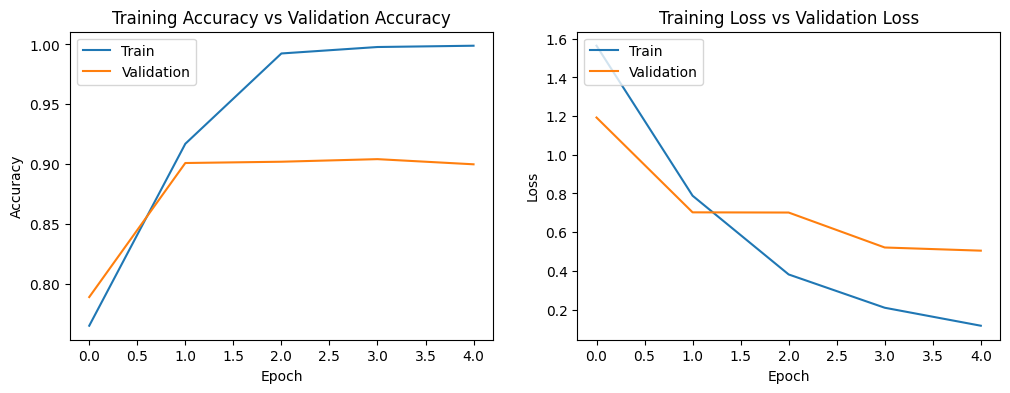

In [10]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

### predicting on Testing data

In [11]:
testing_seq = token.texts_to_sequences(X_test)
test_padded = pad_sequences(testing_seq,padding="post",truncating="post",maxlen=50)


In [12]:
scores = model.evaluate(test_padded, y_test)
print("Loss ", scores[0])
print("Accuracy ", scores[1])

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9217 - loss: 0.3998
Loss  0.4416476786136627
Accuracy  0.9142857193946838
